# Vehicle's Market Price - EDA

This is the **E**xploratory **D**ata **A**nalysis for the vehicle's market price dataset. In this analysis, we are going to analyze the different variables of the model in relation to the vehicle's prices for a better understanding of the dataset.

Here are the steps of the analysis:

### Step 1 - Packages

In [1]:
import pandas as pd
import altair as alt
import pandas_profiling
from vega_datasets import data

In [2]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Step 2 - Data loading

For this model we are using a dataset of vehicle prices downloaded from Austin Reese's public repository in [kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

In [3]:
vehicles = pd.read_csv("../data/vehicles.csv").drop(columns = ['description', 'county'])
vehicles = vehicles.rename(columns = {"lat": "latitude", "long": "longitude"})

### Step 3 - Dataset head

In [4]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,transmission,vin,drive,size,type,paint_color,image_url,state,latitude,longitude
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,ut,40.3744,-104.694


### Step 4 - Data Description

In this dataset we have 17 categorical variables and 7 numerical variables, with the following description:

**Categorical variables:**
- `URL`: The url of the listing on Craiglist
- `Region`: Region where the listing was posted
- `region_url`: Craiglist's Region URL 
- `manufacturer`: Vehicle manufacturer
- `model`: Vehicle model
- `condition`: Vehicle condition according to the user (eg. 'excellent', 'like new')
- `cylinders`: Number of cylinders of the vehicle
- `fuel`: Vehicle fuel type
- `title_status`: Status of the vehicle (eg. 'rebuilt', 'clean')
- `transmission`: Transmission of the vehicle
- `vin`: VIN number of the vehicle
- `drive`: type of drive of the vehicle (eg. '4wd', 'fwd')
- `size`: Size of the vehicle
- `type`: Type of the vehicle (eg. 'SUV', 'pickup', 'sedan')
- `paint_color`: Color of the paint of the vehicle
- `image_url`: URL of the picture of the vehicle
- `state`: State where the listing is posted

**Numerical variables:**
- `id`: id of the listing
- `year`: vehicle's manufacturing year
- `price`: **Response**, price of the vehicle
- `odometer`: Mileage of the vehicle at the moment the listing was posted
- `latitude`: Latitude of the state
- `longitude`: Longitude of the state

The following code shows the variables and its non-null count

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 23 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
state           509577 non-null object
latitude        499285 non-null float64
longitude       499285 non-nul

In order to explore the numerical variables, we used the pd.describe() function. Here we can observe that the maximum market price is $360'000.000 USD. When we looked at this observation unit in detail, we realized the data requires a further outlier treatment.

In [6]:
vehicles.describe()

,id,price,year,odometer,latitude,longitude
count,5.095770e+05,5.095770e+05,508050.000000,4.172530e+05,499285.000000,499285.000000
mean,7.044176e+09,5.479684e+04,2009.662236,1.017300e+05,38.453818,-94.313886
std,4.937219e+06,9.575025e+06,8.567953,1.073790e+05,5.902152,17.717653
min,6.995212e+09,0.000000e+00,1900.000000,0.000000e+00,-82.688100,-165.935000
25%,7.040802e+09,3.995000e+03,2007.000000,4.948800e+04,34.557400,-108.506000
50%,7.045325e+09,9.377000e+03,2011.000000,9.489400e+04,39.145300,-88.678800
75%,7.048556e+09,1.795500e+04,2015.000000,1.387780e+05,42.449000,-81.111400
max,7.050103e+09,3.600029e+09,2021.000000,1.000000e+07,81.569300,94.124800


In addition, we analyzed the frequency of the levels of the categorical variables

In [7]:
numeric_features = ['year', 'odometer']
categorical_features = ['state','manufacturer','model', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

In [8]:
for feat in categorical_features:
    print('Feature: %s' %(feat))
    print('------------')
    print(f'This feature has {len(vehicles[feat].unique())} levels')
    print('------------')
    print(vehicles[feat].value_counts())
    print('\n\n')

Feature: state
------------
This feature has 51 levels
------------
ca    52780
fl    35244
tx    29589
ny    22473
mi    21044
or    19319
oh    19313
nc    19263
wa    15657
pa    15567
wi    15082
tn    13899
va    12962
co    12712
il    11840
ia    11339
nj    10277
id    10085
mn     9877
ma     9573
sc     8903
az     8572
al     8321
mt     8064
ga     7468
in     7364
ar     7185
ks     7092
mo     6797
ok     6677
ct     6671
ky     5879
md     5172
la     4433
nm     4251
ak     3873
nv     3071
nh     2976
hi     2969
vt     2968
me     2963
ri     2963
dc     2961
ne     2646
ms     2507
sd     2347
ut     1670
wv     1631
de     1399
wy     1073
nd      816
Name: state, dtype: int64



Feature: manufacturer
------------
This feature has 44 levels
------------
ford               92601
chevrolet          73661
toyota             38159
nissan             26435
ram                26177
honda              25585
jeep               23951
gmc                23126
dodge           

### Step 5 - Data Visualizations

#### Correlations

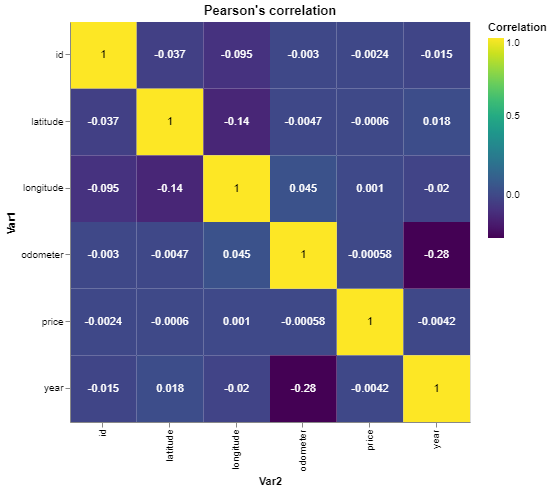

In [9]:
vehicles_corr = vehicles.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
base = alt.Chart(vehicles_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2'),
    color=alt.condition(
        alt.datum.Correlation >= 0.95,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 400,
    height = 400,
    title = "Pearson's correlation"
)

#### Frequency map

In [10]:
vehicles['state'] = vehicles['state'].str.upper()
vehicles_position = vehicles.dropna(subset = ['latitude', 'longitude'])[['state','latitude', 'longitude','price', 'id']]

vehicles_position = vehicles_position.groupby(by = "state")\
                                     .agg({'price': 'mean',
                                          'longitude' : 'mean',
                                          'latitude' : 'mean',
                                          'id': 'count'})\
                                     .reset_index()

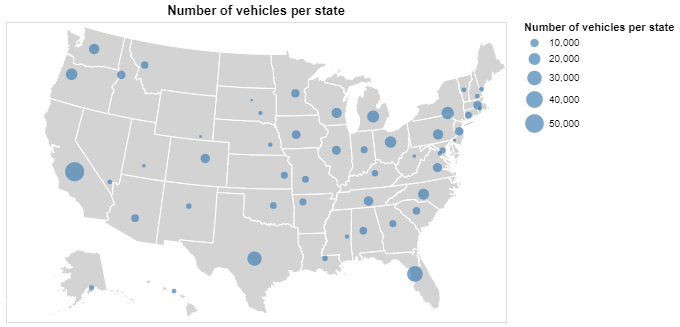

In [11]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(id)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of vehicles per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format=',.2f')]
).properties(
    title='Number of vehicles per state'
)
background + points

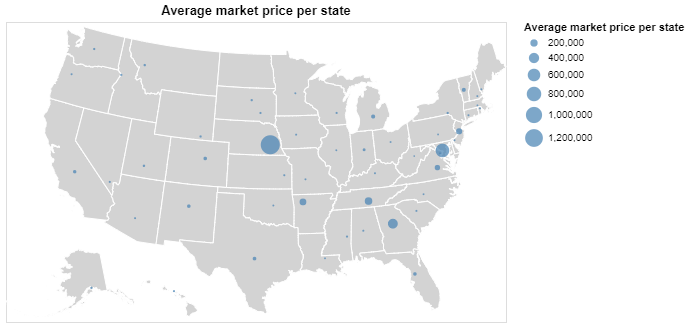

In [12]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(price)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Average market price per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format='$,.2f')]
).properties(
    title='Average market price per state'
)
background + points

#### Market price by numerical variables

In [ ]:
numeric_encondings = ['year:Q', 'odometer:Q']

base = alt.Chart().mark_point().encode(
        alt.Y('price:Q')
    ).properties(
        width=200,
        height=200
    )

chart = alt.vconcat(data = vehicles)

for i in numeric_encondings:
    chart &= base.encode(x=i)
    
chart